# Análisis Exploratorio de Datos (EDA) de la tienda Aurelion

Etapas del EDA (TODO):
1. Definición del problema.
2. Importación e inspección inicial de los datos:
    * Importación de datos.  ✅
    * Inspección de datos (estructura, dimensionalidad, primeras/últimas filas). ✅
    * Integración de datos. ✅
    * Cálculo de estadísticas descriptivas básicas. ✅
3. Limpieza y transformación de datos:
    * Corrección de tipos de datos. ✅
    * Tratamiento de datos ausentes.
    * Tratamiento de inconsistencias de formato.
    * Eliminación de duplicados.
4. Tratamiento de datos atípicos.
5. Análisis univariado (distribución y comportamiento de cada variable).
6. Análisis bivariado (asociaciones y correlaciones).
7. Análisis de tendencias.
8. Conclusiones.

## 1. Definición del problema

Objetivo: Análisis de ventas por periodos (comparativas por mes, trimestre, año), por volumen total de ventas (número de transacciones, cantidad de productos vendidos),total de ingresos o facturación, número de clientes únicos, ventas por género.

## 2. Importación e inspección inicial de los datos:

### Importación de librerías y carga de datos

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ventas = pd.read_excel("./data/ventas.xlsx")
productos = pd.read_excel("./data/productos_corregidos.xlsx")
clientes = pd.read_excel("./data/clientes.xlsx")
detalle_ventas = pd.read_excel("./data/detalle_ventas.xlsx")

### Inspección inicial de los datos

#### Inspección de la tabla "detalle_ventas"

In [160]:
print(detalle_ventas.head(5))
print("-"*80)
print(detalle_ventas.info())
print("-"*80)
print(f"Shape of detalle_ventas: {detalle_ventas.shape}")

   id_venta  id_producto        nombre_producto  cantidad  precio_unitario  \
0         1           90    Toallas Húmedas x50         1             2902   
1         2           82  Aceitunas Negras 200g         5             2394   
2         2           39     Helado Vainilla 1L         5              469   
3         2           70           Fernet 750ml         2             4061   
4         2           22  Medialunas de Manteca         1             2069   

   importe  
0     2902  
1    11970  
2     2345  
3     8122  
4     2069  
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_venta         343 non-null    int64 
 1   id_producto      343 non-null    int64 
 2   nombre_producto  343 non-null    object
 3   cantidad         343 non-null    int64

#### Inspección de la tabla "ventas"

In [161]:
print(ventas.head(5))
print("-"*80)
print(ventas.info())
print("-"*80)
print(f"Shape of ventas: {ventas.shape}")

   id_venta      fecha  id_cliente    nombre_cliente  \
0         1 2024-06-19          62  Guadalupe Romero   
1         2 2024-03-17          49      Olivia Gomez   
2         3 2024-01-13          20      Tomas Acosta   
3         4 2024-02-27          36    Martina Molina   
4         5 2024-06-11          56        Bruno Diaz   

                       email     medio_pago  
0  guadalupe.romero@mail.com        tarjeta  
1      olivia.gomez@mail.com             qr  
2      tomas.acosta@mail.com        tarjeta  
3    martina.molina@mail.com  transferencia  
4        bruno.diaz@mail.com        tarjeta  
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venta        120 non-null    int64         
 1   fecha           120 non-null    datetime6

#### Inspección de la tabla "productos"

In [162]:
print(productos.head(5))
print("-"*80)
print(productos.info())
print("-"*80)
print(f"Shape of productos: {productos.shape}")

   id_producto     nombre_producto  categoria  precio_unitario  \
0            1      Coca Cola 1.5L  Alimentos             2347   
1            2          Pepsi 1.5L   Limpieza             4973   
2            3         Sprite 1.5L  Alimentos             4964   
3            4  Fanta Naranja 1.5L   Limpieza             2033   
4            5  Agua Mineral 500ml  Alimentos             4777   

  categoria_corregida  
0           Alimentos  
1           Alimentos  
2           Alimentos  
3           Alimentos  
4           Alimentos  
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_producto          100 non-null    int64 
 1   nombre_producto      100 non-null    object
 2   categoria            100 non-null    object
 3   precio_unitario      100 

#### Inspección de la tabla "clientes"

In [163]:
print(clientes.head(5))
print("-"*80)
print(clientes.info())
print("-"*80)
print(f"Shape of clientes: {clientes.shape}")

   id_cliente   nombre_cliente                     email      ciudad  \
0           1    Mariana Lopez    mariana.lopez@mail.com  Carlos Paz   
1           2    Nicolas Rojas    nicolas.rojas@mail.com  Carlos Paz   
2           3  Hernan Martinez  hernan.martinez@mail.com  Rio Cuarto   
3           4     Uma Martinez     uma.martinez@mail.com  Carlos Paz   
4           5  Agustina Flores  agustina.flores@mail.com     Cordoba   

  fecha_alta  
0 2023-01-01  
1 2023-01-02  
2 2023-01-03  
3 2023-01-04  
4 2023-01-05  
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_cliente      100 non-null    int64         
 1   nombre_cliente  100 non-null    object        
 2   email           100 non-null    object        
 3   ciudad          100 non-null

### Integración de datos

Con base en la inspección inicial de los datos, hemos concluido que es posible la unificación de los 4 dataframes bajo las siguientes premisas:
* Unir ventas y detalle_ventas en id_venta.
* Unir productos y detalle_ventas en id_producto.
* Unir clientes y ventas en id_cliente.
A continuación se muestra la unificación con base en nuestras observaciones:

In [164]:
df_unified = ventas.merge(detalle_ventas, on="id_venta", suffixes=("_ventas", "_dventas"))
df_unified = df_unified.merge(productos, on="id_producto", suffixes=("_dventas", "_producto"))
df_unified = df_unified.merge(clientes, on="id_cliente", suffixes=("_ventas", "_cliente"))

df_unified.head()

,id_venta,fecha,id_cliente,nombre_cliente_ventas,email_ventas,medio_pago,id_producto,nombre_producto_dventas,cantidad,precio_unitario_dventas,importe,nombre_producto_producto,categoria,precio_unitario_producto,categoria_corregida,nombre_cliente_cliente,email_cliente,ciudad,fecha_alta
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,90,Toallas Húmedas x50,1,2902,2902,Toallas Húmedas x50,Limpieza,2902,Limpieza,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,82,Aceitunas Negras 200g,5,2394,11970,Aceitunas Negras 200g,Limpieza,2394,Alimentos,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
2,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,39,Helado Vainilla 1L,5,469,2345,Helado Vainilla 1L,Alimentos,469,Alimentos,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
3,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,70,Fernet 750ml,2,4061,8122,Fernet 750ml,Limpieza,4061,Alimentos,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
4,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,22,Medialunas de Manteca,1,2069,2069,Medialunas de Manteca,Limpieza,2069,Alimentos,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18


Podemos observar más a detalle los nombres de las columnas para eliminar aquellas que estén duplicadas.

In [165]:
df_unified.info()
print(f"Shape of df_unified: {df_unified.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_venta                  343 non-null    int64         
 1   fecha                     343 non-null    datetime64[ns]
 2   id_cliente                343 non-null    int64         
 3   nombre_cliente_ventas     343 non-null    object        
 4   email_ventas              343 non-null    object        
 5   medio_pago                343 non-null    object        
 6   id_producto               343 non-null    int64         
 7   nombre_producto_dventas   343 non-null    object        
 8   cantidad                  343 non-null    int64         
 9   precio_unitario_dventas   343 non-null    int64         
 10  importe                   343 non-null    int64         
 11  nombre_producto_producto  343 non-null    object        
 12  categoria             

Nótese que son 19 columnas en total y de ellas, se tienen duplicados de **nombre_cliente**, **email**, **nombre_producto** y **precio_unitario**. Procederemos a remover los duplicados.

In [195]:
df_unified = df_unified.T.drop_duplicates().T
df_unified.info()
print(f"Shape of df_unified: {df_unified.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_venta             343 non-null    object
 1   fecha                343 non-null    object
 2   id_cliente           343 non-null    object
 3   nombre_cliente       343 non-null    object
 4   email_ventas         343 non-null    object
 5   medio_pago           343 non-null    object
 6   id_producto          343 non-null    object
 7   nombre_producto      343 non-null    object
 8   cantidad             343 non-null    object
 9   precio_unitario      343 non-null    object
 10  importe              343 non-null    object
 11  categoria            343 non-null    object
 12  categoria_corregida  343 non-null    object
 13  ciudad               343 non-null    object
 14  fecha_alta           343 non-null    object
dtypes: object(15)
memory usage: 40.3+ KB
Shape of df_unified:

Ahora tenemos 15 columnas. Nótese también que al usar la transpuesta para eliminar columnas duplicadas, se han cambiado todos los tipos de datos a "object". Esto se corregirá en la siguiente estapa. Mientras procederemos a renombrar aquellas columnasque no fueron eliminadas.

In [196]:
df_unified = df_unified.rename(
    columns={
        "nombre_cliente_ventas": "nombre_cliente",
        "email_ventas": "email",
        "nombre_producto_dventas": "nombre_producto",
        "precio_unitario_dventas": "precio_unitario",
    }
)
df_unified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_venta             343 non-null    object
 1   fecha                343 non-null    object
 2   id_cliente           343 non-null    object
 3   nombre_cliente       343 non-null    object
 4   email                343 non-null    object
 5   medio_pago           343 non-null    object
 6   id_producto          343 non-null    object
 7   nombre_producto      343 non-null    object
 8   cantidad             343 non-null    object
 9   precio_unitario      343 non-null    object
 10  importe              343 non-null    object
 11  categoria            343 non-null    object
 12  categoria_corregida  343 non-null    object
 13  ciudad               343 non-null    object
 14  fecha_alta           343 non-null    object
dtypes: object(15)
memory usage: 40.3+ KB


### Cálculo de estadísticas descriptivas básicas

In [197]:
df_unified.describe(include='all')

C:\Users\motam\AppData\Local\Temp\ipykernel_1204\154445536.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df_unified.describe(include='all')
C:\Users\motam\AppData\Local\Temp\ipykernel_1204\154445536.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df_unified.describe(include='all')


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago,id_producto,nombre_producto,cantidad,precio_unitario,importe,categoria,categoria_corregida,ciudad,fecha_alta
count,343,343,343,343,343,343,343,343,343,343.0,343.0,343,343,343,343
unique,120,93,67,64,67,4,95,95,5,94.0,249.0,2,2,6,67
top,2,2024-01-19 00:00:00,5,Agustina Flores,agustina.flores@mail.com,efectivo,18,Queso Rallado 150g,2,3444.0,4752.0,Limpieza,Alimentos,Rio Cuarto,2023-01-05 00:00:00
freq,5,10,15,15,15,111,9,9,83,9.0,4.0,178,286,104,15


## 3. Limpieza y transformación de datos

### Corrección de tipos de datos

Sabemos que en el proceso de integración de datos, los tipos de datos de las columnas del dataframe fueron cambiadas, por tanto, procederemos a esta corrección. Primero visualizaremos nuevamente nuestros datos.

In [198]:
df_unified.head(5)

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago,id_producto,nombre_producto,cantidad,precio_unitario,importe,categoria,categoria_corregida,ciudad,fecha_alta
0,1,2024-06-19 00:00:00,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,90,Toallas Húmedas x50,1,2902.0,2902.0,Limpieza,Limpieza,Carlos Paz,2023-03-03 00:00:00
1,2,2024-03-17 00:00:00,49,Olivia Gomez,olivia.gomez@mail.com,qr,82,Aceitunas Negras 200g,5,2394.0,11970.0,Limpieza,Alimentos,Rio Cuarto,2023-02-18 00:00:00
2,2,2024-03-17 00:00:00,49,Olivia Gomez,olivia.gomez@mail.com,qr,39,Helado Vainilla 1L,5,469.0,2345.0,Alimentos,Alimentos,Rio Cuarto,2023-02-18 00:00:00
3,2,2024-03-17 00:00:00,49,Olivia Gomez,olivia.gomez@mail.com,qr,70,Fernet 750ml,2,4061.0,8122.0,Limpieza,Alimentos,Rio Cuarto,2023-02-18 00:00:00
4,2,2024-03-17 00:00:00,49,Olivia Gomez,olivia.gomez@mail.com,qr,22,Medialunas de Manteca,1,2069.0,2069.0,Limpieza,Alimentos,Rio Cuarto,2023-02-18 00:00:00


Procederemos a la correción del tipo utilizando "astype":

In [199]:
df_unified = df_unified.astype(
    {
        "id_venta": "int",
        "fecha": "datetime64[ns]",
        "id_cliente": "int",
        "nombre_cliente": "string",
        "email": "string",
        "medio_pago": "string",
        "id_producto": "int",
        "nombre_producto": "string",
        "cantidad": "int",
        "precio_unitario": "float",
        "importe": "float",
        "categoria": "string",
        "categoria_corregida": "string",
        "ciudad": "string",
        "fecha_alta": "datetime64[ns]"
    }
)

Vamos a comprobar los cambios con dtypes:

In [194]:
df_unified.dtypes

id_venta                        int64
fecha                  datetime64[ns]
id_cliente                      int64
nombre_cliente         string[python]
email_ventas           string[python]
medio_pago             string[python]
id_producto                     int64
nombre_producto        string[python]
cantidad                        int64
precio_unitario               float64
importe                       float64
categoria              string[python]
categoria_corregida    string[python]
ciudad                 string[python]
fecha_alta             datetime64[ns]
dtype: object

### Tratamiento de datos ausentes

### Tratamiento de inconsistencias de formato

De igual forma, procederemos a eliminar "categoría" y renombrar "categoría_corregida", dado el proceso que se le aplicó en el sprint 1.

In [200]:
df_unified = df_unified.drop(columns=["categoria"])
df_unified = df_unified.rename(columns={"categoria_corregida": "categoria"})
df_unified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_venta         343 non-null    int64         
 1   fecha            343 non-null    datetime64[ns]
 2   id_cliente       343 non-null    int64         
 3   nombre_cliente   343 non-null    string        
 4   email            343 non-null    string        
 5   medio_pago       343 non-null    string        
 6   id_producto      343 non-null    int64         
 7   nombre_producto  343 non-null    string        
 8   cantidad         343 non-null    int64         
 9   precio_unitario  343 non-null    float64       
 10  importe          343 non-null    float64       
 11  categoria        343 non-null    string        
 12  ciudad           343 non-null    string        
 13  fecha_alta       343 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4)

### Eliminación de duplicados

# 4. Tratamiento de datos atípicos

# 5. Análisis univariado

# 6. Análisis bivariado (asociaciones y correlaciones)

# 7. Análisis de tendencias


DataFrame con fechas aleatorias de 2025 reemplazadas:
   id_venta      fecha  id_cliente    nombre_cliente  \
0         1 2025-06-28          62  Guadalupe Romero   
1         2 2025-12-25          49      Olivia Gomez   
2         3 2025-01-20          20      Tomas Acosta   
3         4 2025-03-04          36    Martina Molina   
4         5 2025-09-06          56        Bruno Diaz   

                       email     medio_pago  
0  guadalupe.romero@mail.com        tarjeta  
1      olivia.gomez@mail.com             qr  
2      tomas.acosta@mail.com        tarjeta  
3    martina.molina@mail.com  transferencia  
4        bruno.diaz@mail.com        tarjeta  


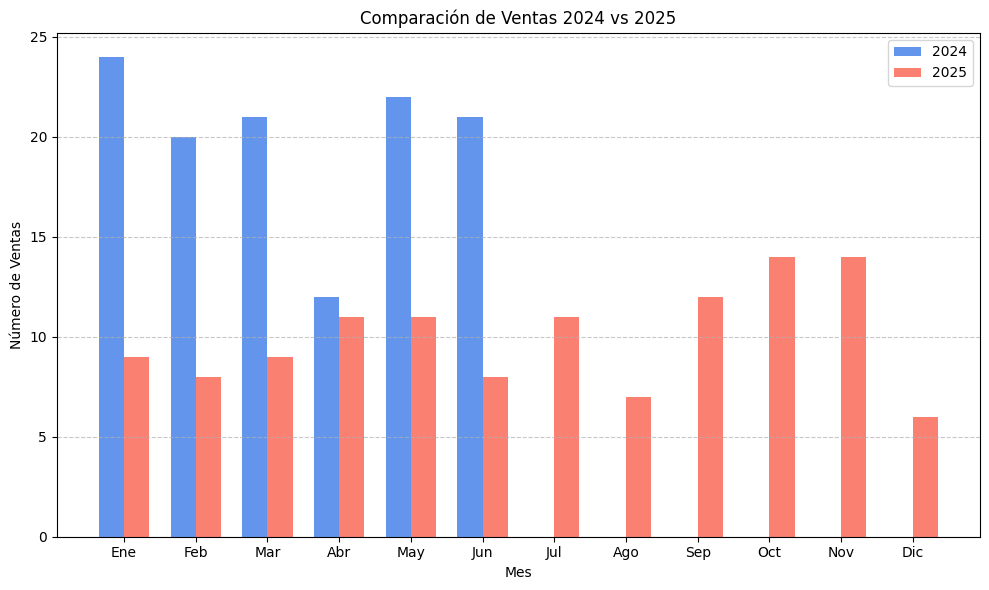

In [201]:
ventas_2024 = pd.read_excel("./data/ventas.xlsx")
ventas_2025 = ventas_2024.copy()
num_filas = len(ventas_2024['fecha'])
# 3. Definir el rango de fechas para 2025
fecha_inicio = pd.to_datetime('2025-01-01')
fecha_fin = pd.to_datetime('2025-12-31')
rango_dias = (fecha_fin - fecha_inicio).days

# 4. Generar fechas aleatorias
# Creamos una serie de días aleatorios dentro del rango 2025
dias_aleatorios = np.random.randint(0, rango_dias + 1, size=num_filas)

# Sumamos los días aleatorios a la fecha de inicio para obtener las fechas finales
fechas_aleatorias_2025 = fecha_inicio + pd.to_timedelta(dias_aleatorios, unit='D')

# 5. Reemplazar la columna 'Fecha' con las nuevas fechas aleatorias de 2025
ventas_2025['fecha'] = fechas_aleatorias_2025

# 6. Mostrar el resultado (las primeras 5 filas)
print("\nDataFrame con fechas aleatorias de 2025 reemplazadas:")
print(ventas_2025.head())

# OPCIONAL: Guardar el resultado en un nuevo archivo Excel
# df.to_excel("ventas_2025_aleatorias.xlsx", index=False)

# 2️⃣ Convertir la columna 'fecha' a tipo datetime
ventas_2024["fecha"] = pd.to_datetime(ventas_2024["fecha"])
ventas_2025["fecha"] = pd.to_datetime(ventas_2025["fecha"])

# 3️⃣ Extraer el mes de la fecha
ventas_2024["mes"] = ventas_2024["fecha"].dt.month
ventas_2025["mes"] = ventas_2025["fecha"].dt.month

# 4️⃣ Agrupar por mes y contar ventas (o sumar montos si tienes una columna de totales)
ventas_2024_mes = ventas_2024.groupby("mes").size()
ventas_2025_mes = ventas_2025.groupby("mes").size()

# 5️⃣ Alinear ambos años para asegurar que todos los meses estén presentes
meses = range(1, 13)
ventas_2024_mes = ventas_2024_mes.reindex(meses, fill_value=0)
ventas_2025_mes = ventas_2025_mes.reindex(meses, fill_value=0)

# 6️⃣ Preparar datos para el gráfico
categorias = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
              'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
ventas_2024 = ventas_2024_mes.values
ventas_2025 = ventas_2025_mes.values

x = np.arange(len(categorias))  # posiciones para cada categoría
width = 0.35  # ancho de cada barra

# 7️⃣ Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, ventas_2024, width=width, label='2024', color='cornflowerblue')
plt.bar(x + width/2, ventas_2025, width=width, label='2025', color='salmon')

# 8️⃣ Personalizar
plt.title("Comparación de Ventas 2024 vs 2025")
plt.xlabel("Mes")
plt.ylabel("Número de Ventas")
plt.xticks(x, categorias)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 8. Conclusiones